# Nioh 2

In [2]:
from typing import Dict, Final, Optional

from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


pd.options.display.max_columns = 0


SPECIAL: Final = Series(["base", "level"])

BASE_STATS: Final = Series(
    [
        "constitution",
        "heart",
        "courage",
        "stamina",
        "strength",
        "skill",
        "dexterity",
        "magic",
    ]
)

WEAPONS_STATS: Final = DataFrame(
    {
        "Sword": ["", "B+", "", "", "C", "C", "", ""],
        "Tachi": ["", "B+", "", "", "D+", "C+", "", ""],
        "Dual Swords": ["", "C+", "", "", "D+", "B+", "", ""],
        "Spear": ["B+", "", "", "", "C", "C", "", ""],
        "Splitstaff": ["", "", "C+", "", "D+", "", "", "B+"],
        "Axe": ["", "", "C+", "B+", "D+", "", "", ""],
        "Hammer": ["C+", "", "D+", "B+", "", "", "", ""],
        "Kusarigama": ["", "", "", "", "D+", "C+", "B+", ""],
        "Odachi": ["", "D+", "", "C+", "B+", "", "", ""],
        "Deep Curve": ["", "C", "", "C", "B+", "", "", ""],
        "Tonfa": ["C+", "", "B+", "", "", "", "D+", ""],
        "Hatchets": ["", "", "C+", "", "", "B+", "", "D+"],
        "Switchglaive": ["C", "", "", "", "", "C", "", "B+"],
        "Fists": ["", "D+", "", "", "B+", "", "C+", ""],
        "Bow": ["", "B+", "", "", "", "C+", "D+", ""],
        "Rifle": ["", "", "C+", "", "", "B+", "D+", ""],
        "Handcannon": ["", "", "D+", "B+", "", "C+", "", ""],
    },
    index=BASE_STATS,
)

GENERAL_STATS: Final = Series(
    [
        "Life",
        "Ki",
        "KiRecovery",
        "Weight",
        "Pulse",
        "Ninjutsu",
        "NinjutsuCapacity",
        "Onmyo",
        "OnmyoCapacity",
        "Fire",
        "Water",
        "Lightning",
        "Poison",
        "Paralysis",
    ]
)

BASE_STATS_DICT: Final = {
    "constitution": GENERAL_STATS[[0, 12, 13]],
    "heart": GENERAL_STATS[[1, 2, 9]],
    "courage": GENERAL_STATS[[2, 7, 11]],
    "stamina": GENERAL_STATS[[0, 3]],
    "strength": GENERAL_STATS[[3, 4, 10]],
    "skill": GENERAL_STATS[[4, 5]],
    "dexterity": GENERAL_STATS[[5, 6, 12, 13]],
    "magic": GENERAL_STATS[[7, 8]],
}

data: Final[Dict[str, DataFrame]] = dict()

for name in SPECIAL:
    data[name] = pd.read_csv(f"data/{name}.csv")

for name in BASE_STATS:
    data[name] = pd.read_csv(f"data/{name}.csv")

for name in GENERAL_STATS:
    cols = []
    keys = []
    for stat_name in BASE_STATS:
        if data[stat_name][name].max() > 0:
            keys.append(stat_name)
            cols.append(data[stat_name][name])
    data[name] = pd.concat(cols, axis=1, keys=keys)


In [3]:
WEAPONS_STATS

,Sword,Tachi,Dual Swords,Spear,Splitstaff,Axe,Hammer,Kusarigama,Odachi,Deep Curve,Tonfa,Hatchets,Switchglaive,Fists,Bow,Rifle,Handcannon
constitution,,,,B+,,,C+,,,,C+,,C,,,,
heart,B+,B+,C+,,,,,,D+,C,,,,D+,B+,,
courage,,,,,C+,C+,D+,,,,B+,C+,,,,C+,D+
stamina,,,,,,B+,B+,,C+,C,,,,,,,B+
strength,C,D+,D+,C,D+,D+,,D+,B+,B+,,,,B+,,,
skill,C,C+,B+,C,,,,C+,,,,B+,C,,C+,B+,C+
dexterity,,,,,,,,B+,,,D+,,,C+,D+,D+,
magic,,,,,B+,,,,,,,D+,B+,,,,


In [4]:
import math


def stat_plot(stat_name: str, *, start: int = 1, end: Optional[int] = None):
    df = data[stat_name][start:end]
    max_value = math.ceil(df.max(axis=1).max())
    return df.plot.bar(
        figsize=(30, 15),
        ylim=(0, max_value),
        table=True,
        rot=0,
    )


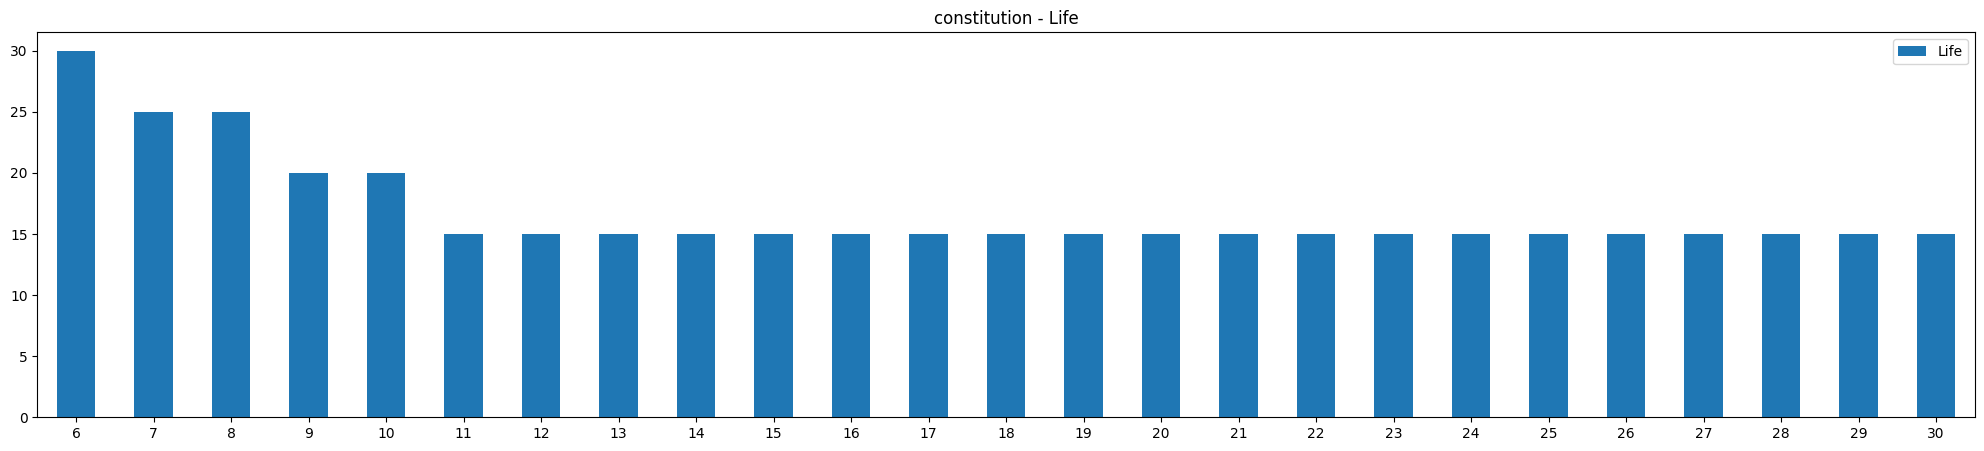

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Life,30,25,25,20,20,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


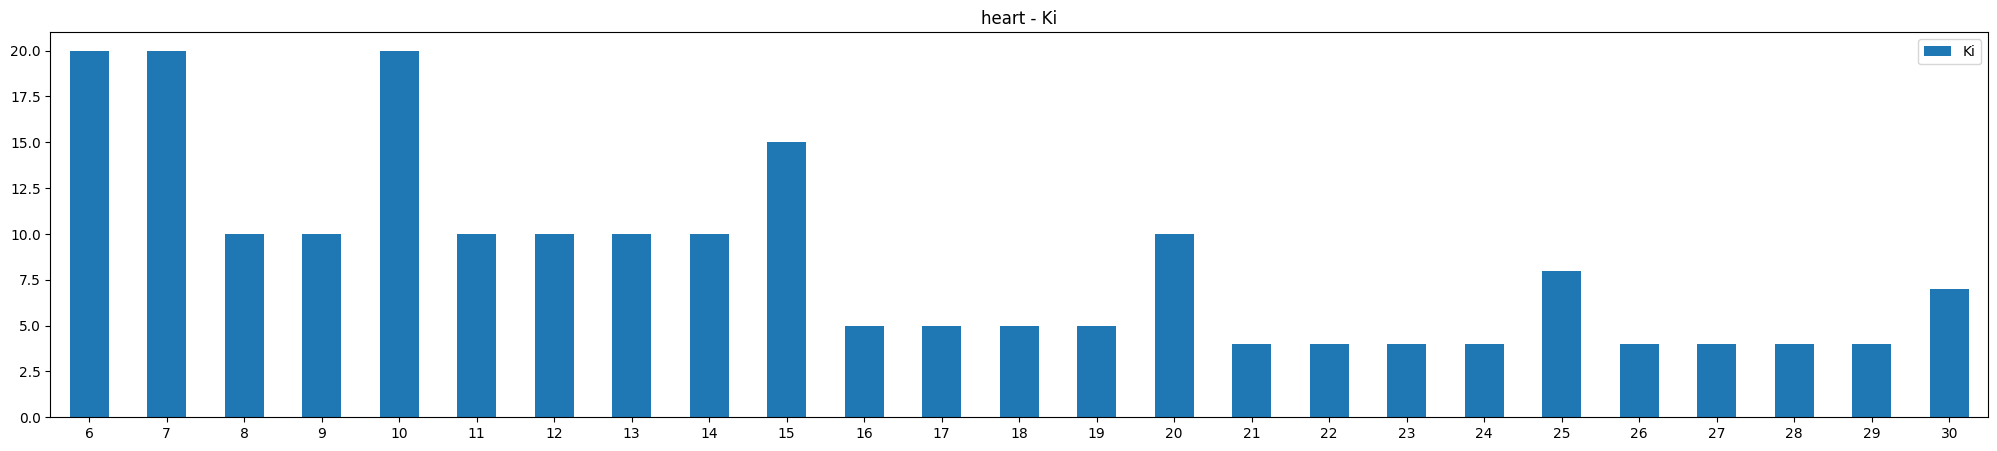

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Ki,20,20,10,10,20,10,10,10,10,15,5,5,5,5,10,4,4,4,4,8,4,4,4,4,7


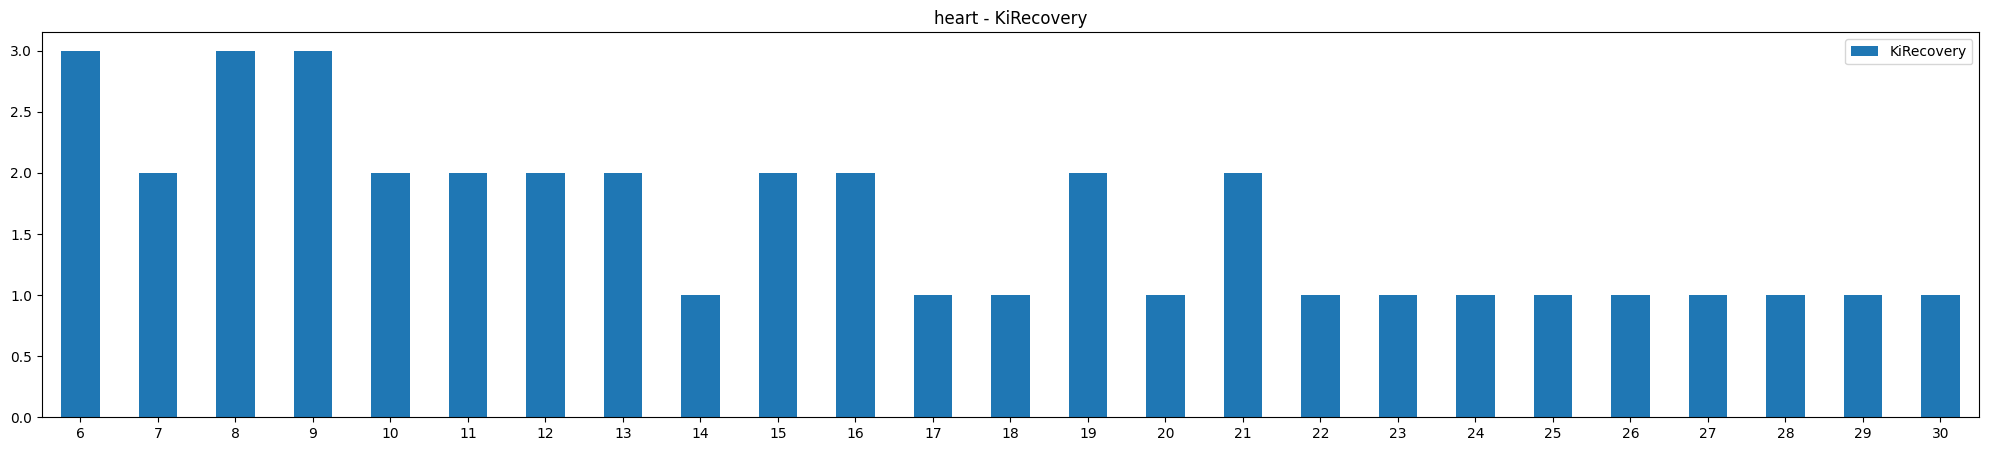

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
KiRecovery,3,2,3,3,2,2,2,2,1,2,2,1,1,2,1,2,1,1,1,1,1,1,1,1,1


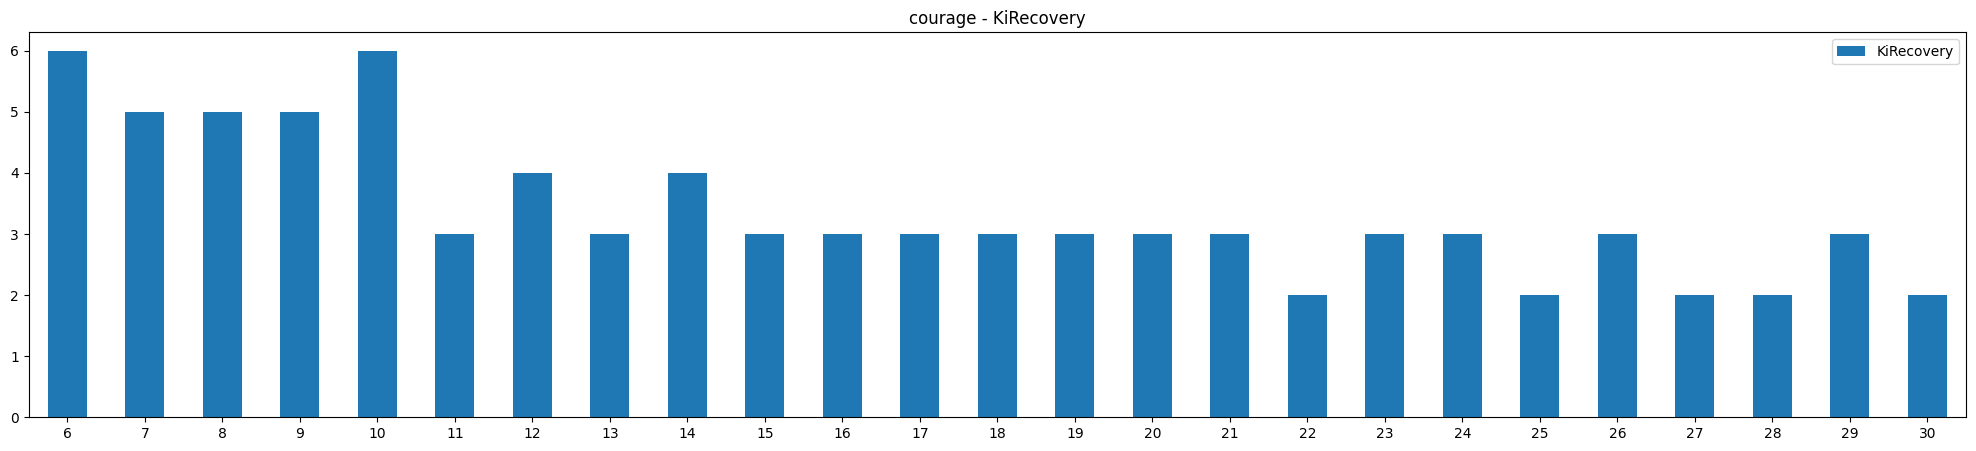

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
KiRecovery,6,5,5,5,6,3,4,3,4,3,3,3,3,3,3,3,2,3,3,2,3,2,2,3,2


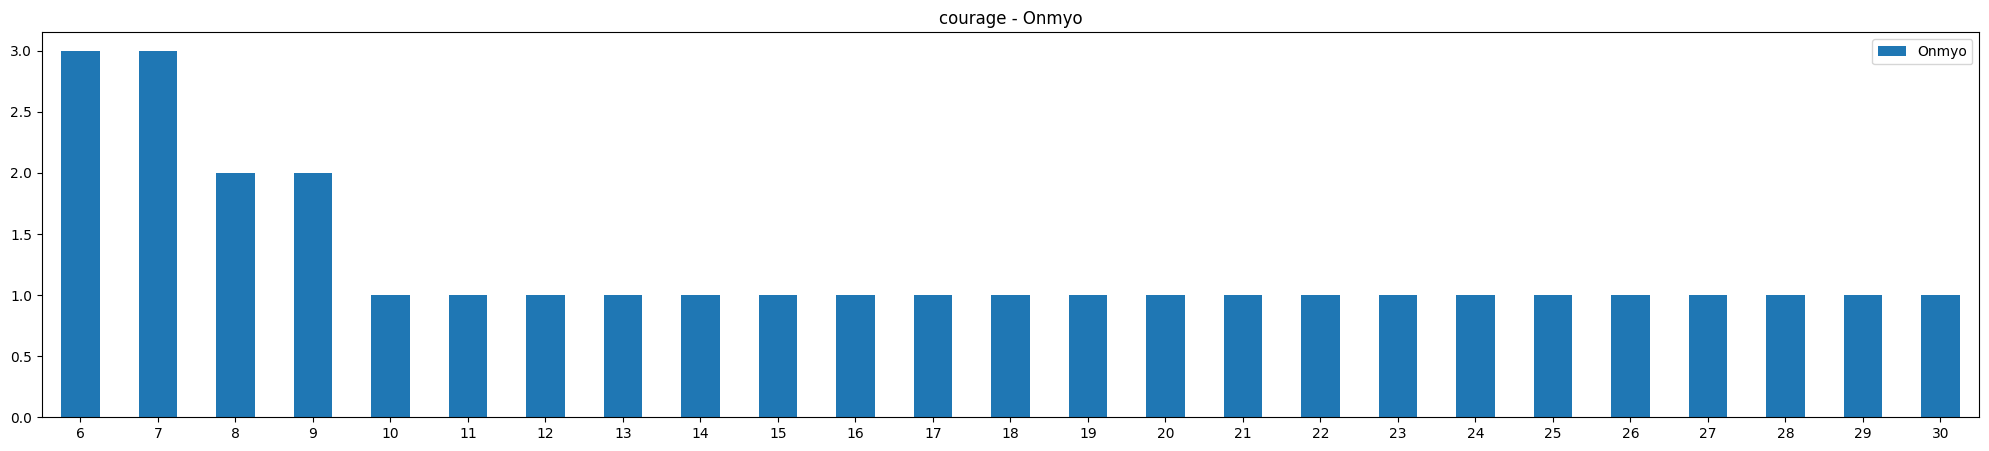

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Onmyo,3,3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


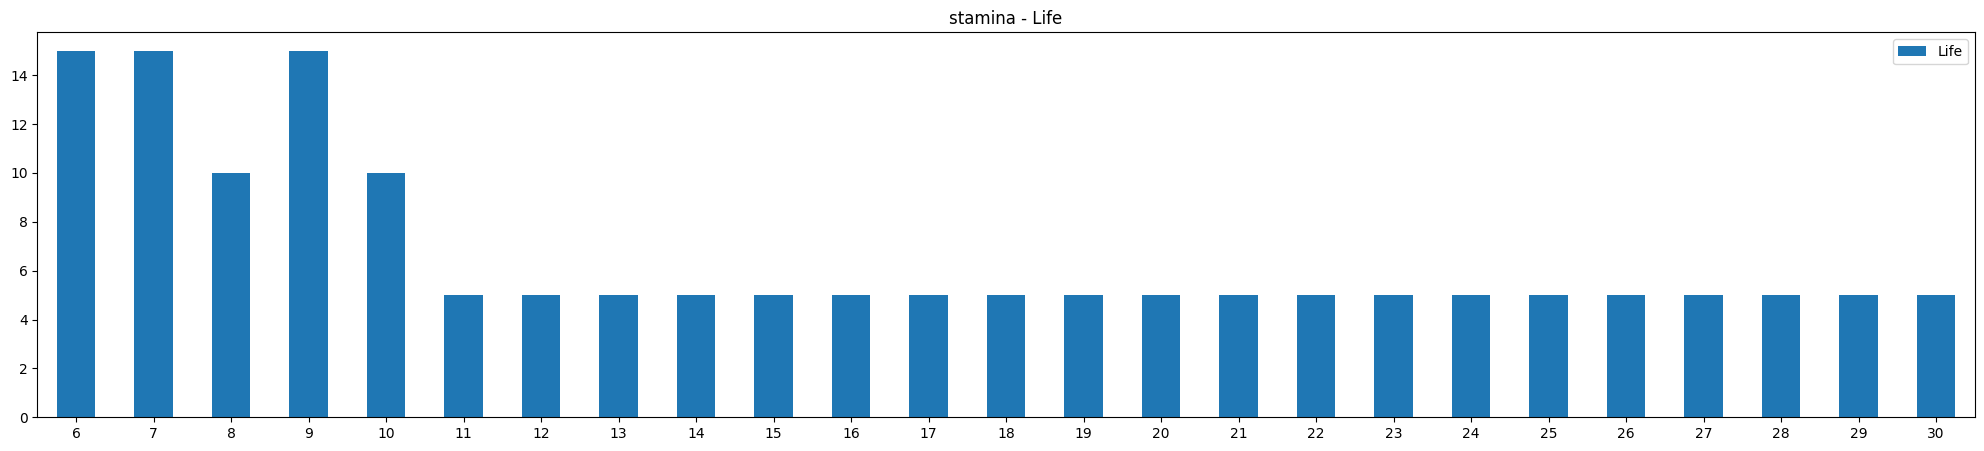

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Life,15,15,10,15,10,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


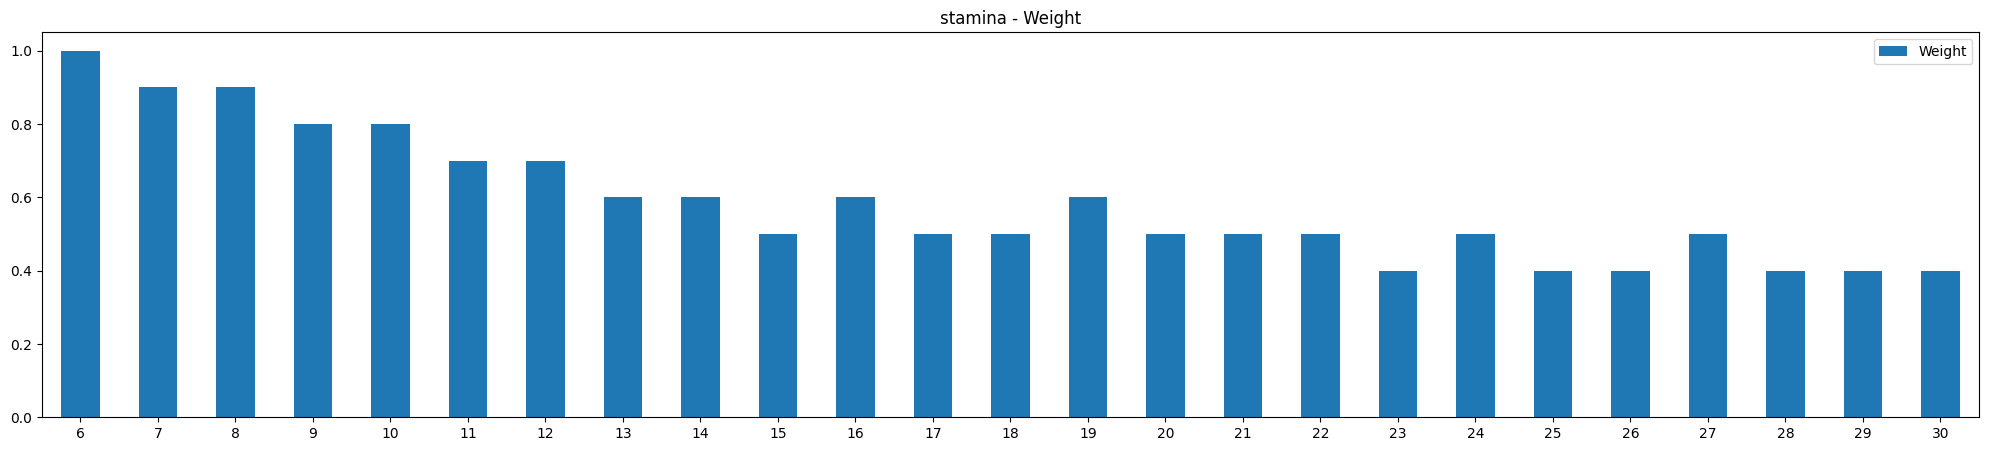

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Weight,1.0,0.9,0.9,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.6,0.5,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.4,0.4,0.5,0.4,0.4,0.4


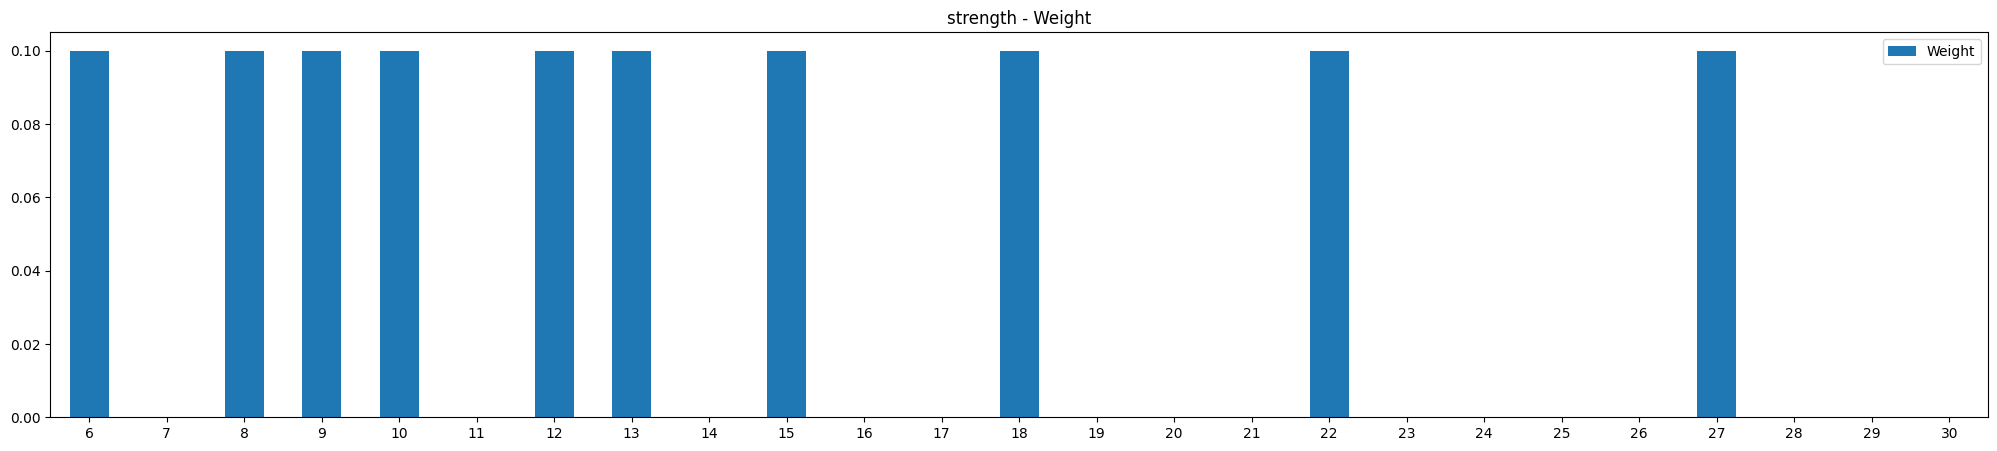

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Weight,0.1,0.0,0.1,0.1,0.1,0.0,0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0


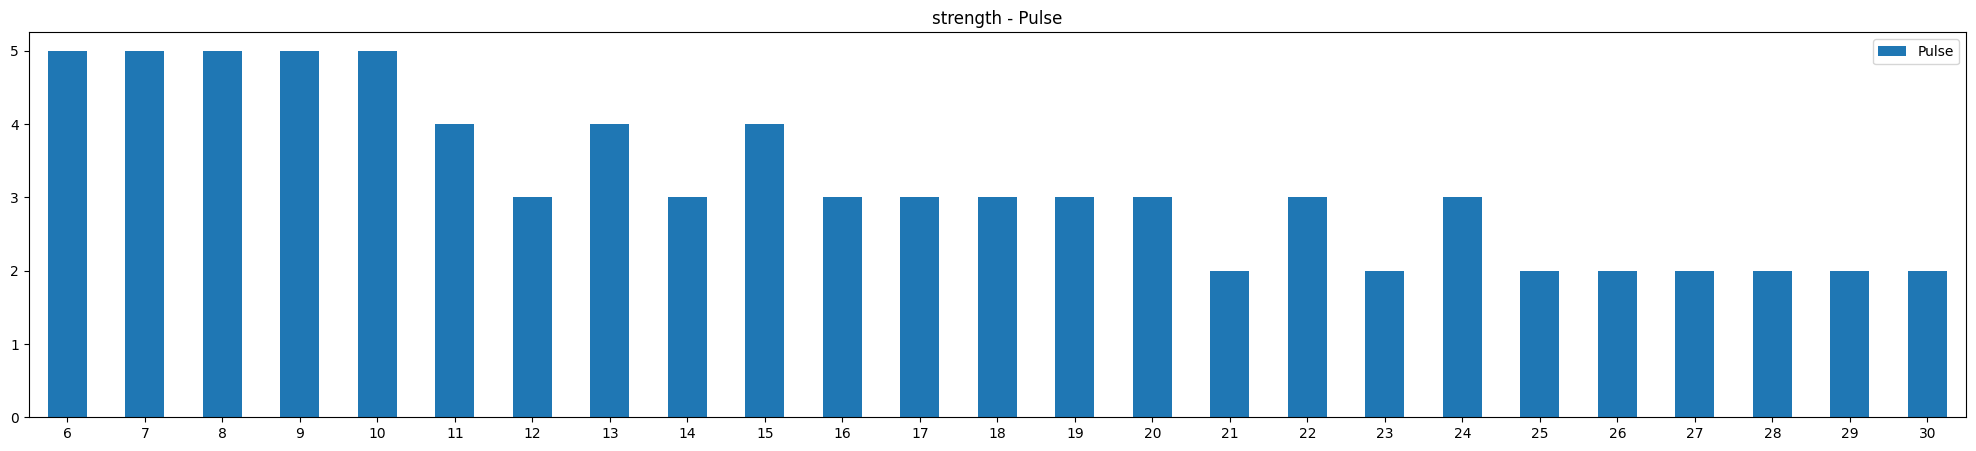

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Pulse,5,5,5,5,5,4,3,4,3,4,3,3,3,3,3,2,3,2,3,2,2,2,2,2,2


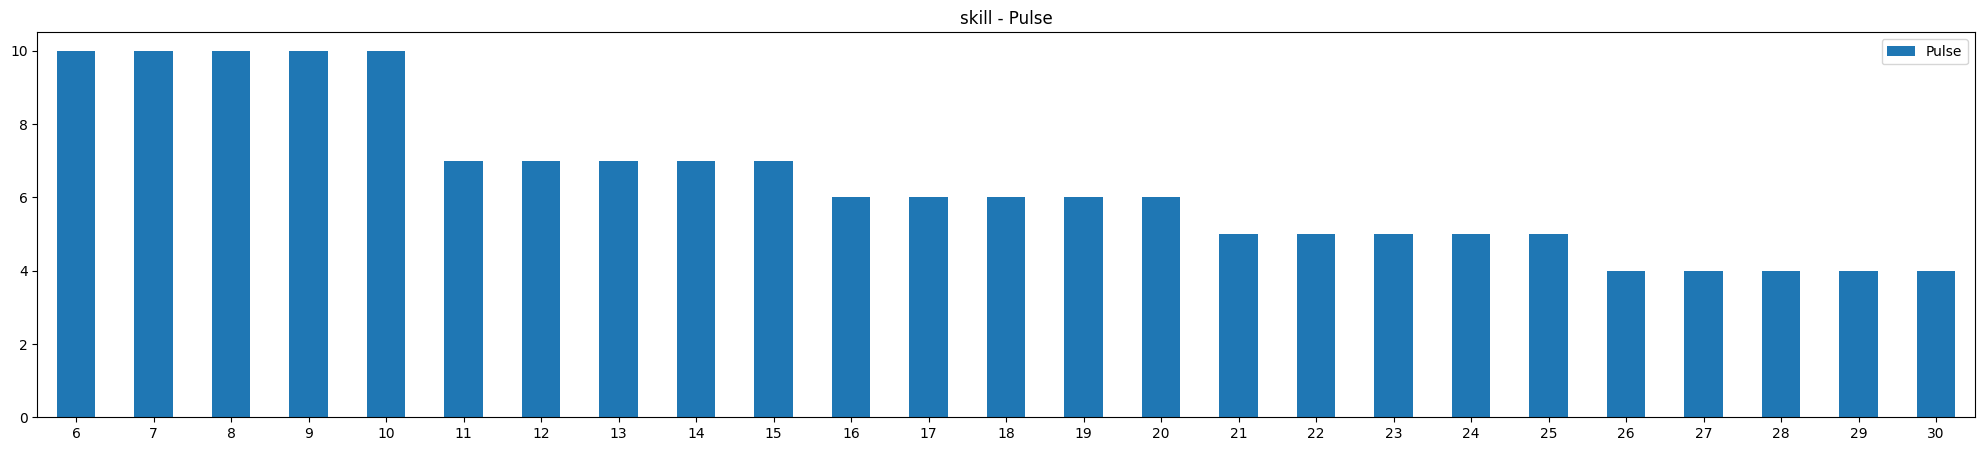

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Pulse,10,10,10,10,10,7,7,7,7,7,6,6,6,6,6,5,5,5,5,5,4,4,4,4,4


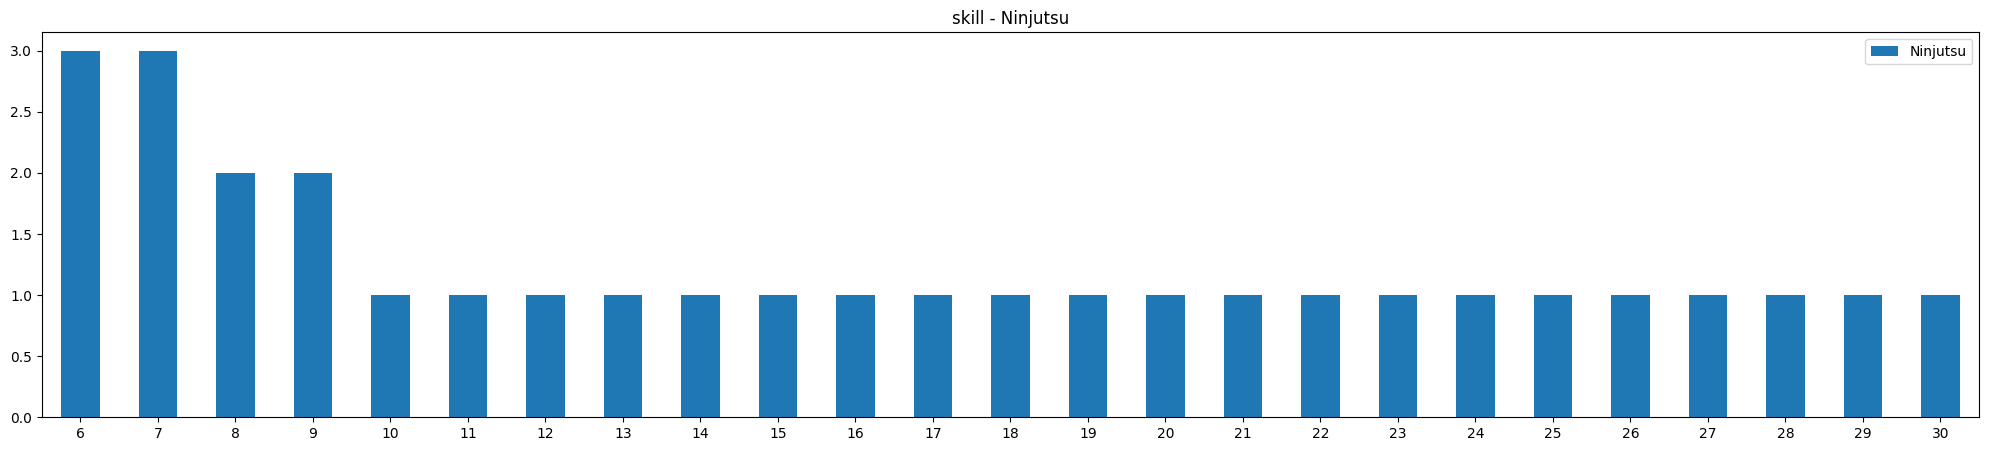

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Ninjutsu,3,3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


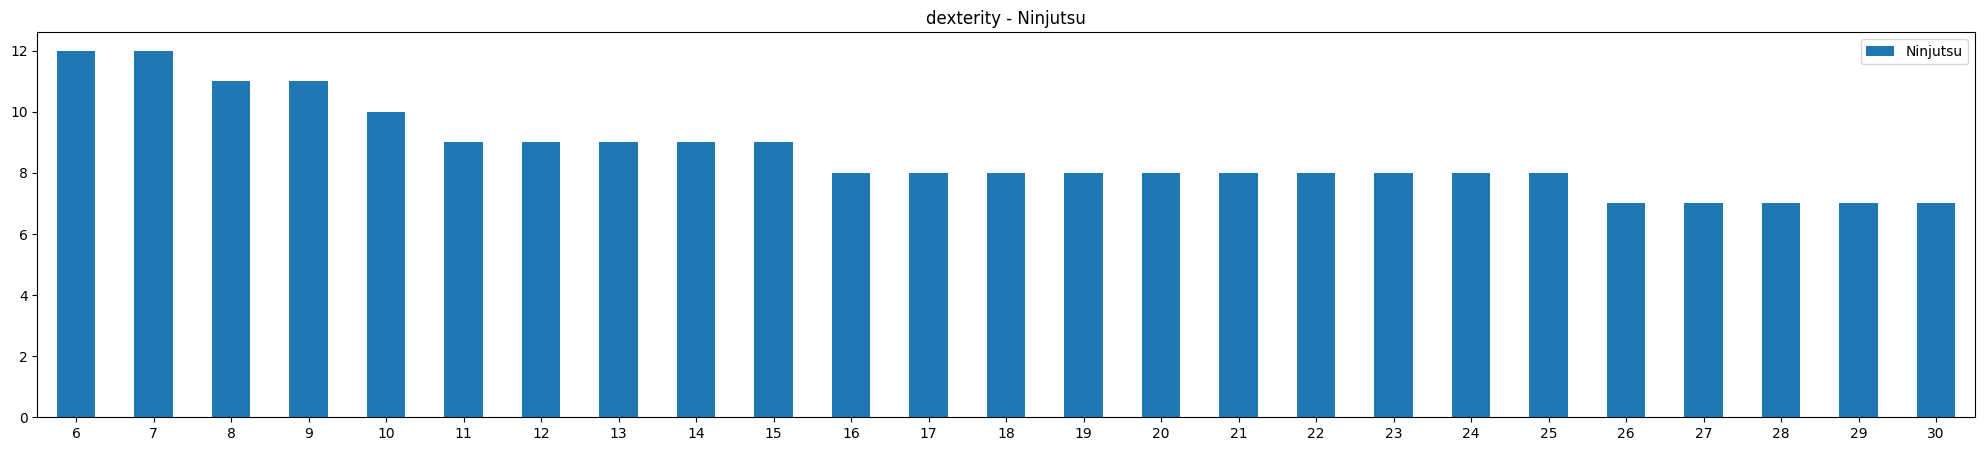

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Ninjutsu,12,12,11,11,10,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7


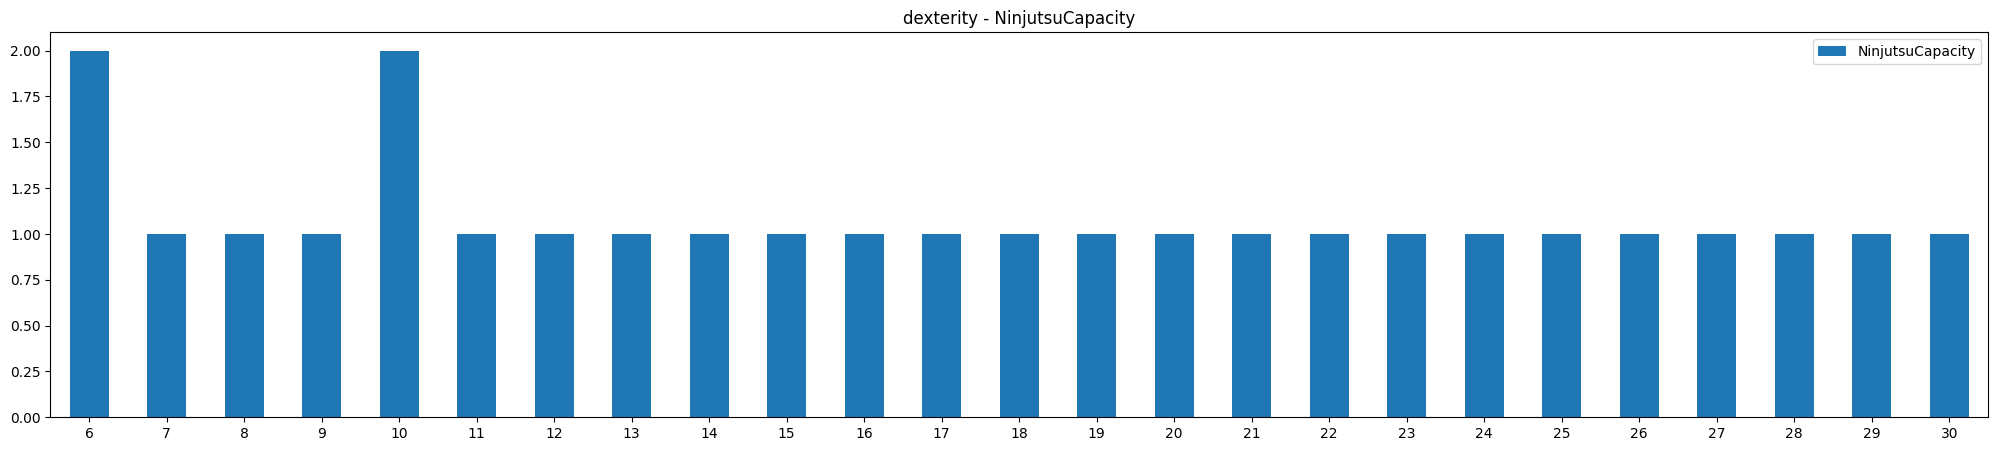

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
NinjutsuCapacity,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


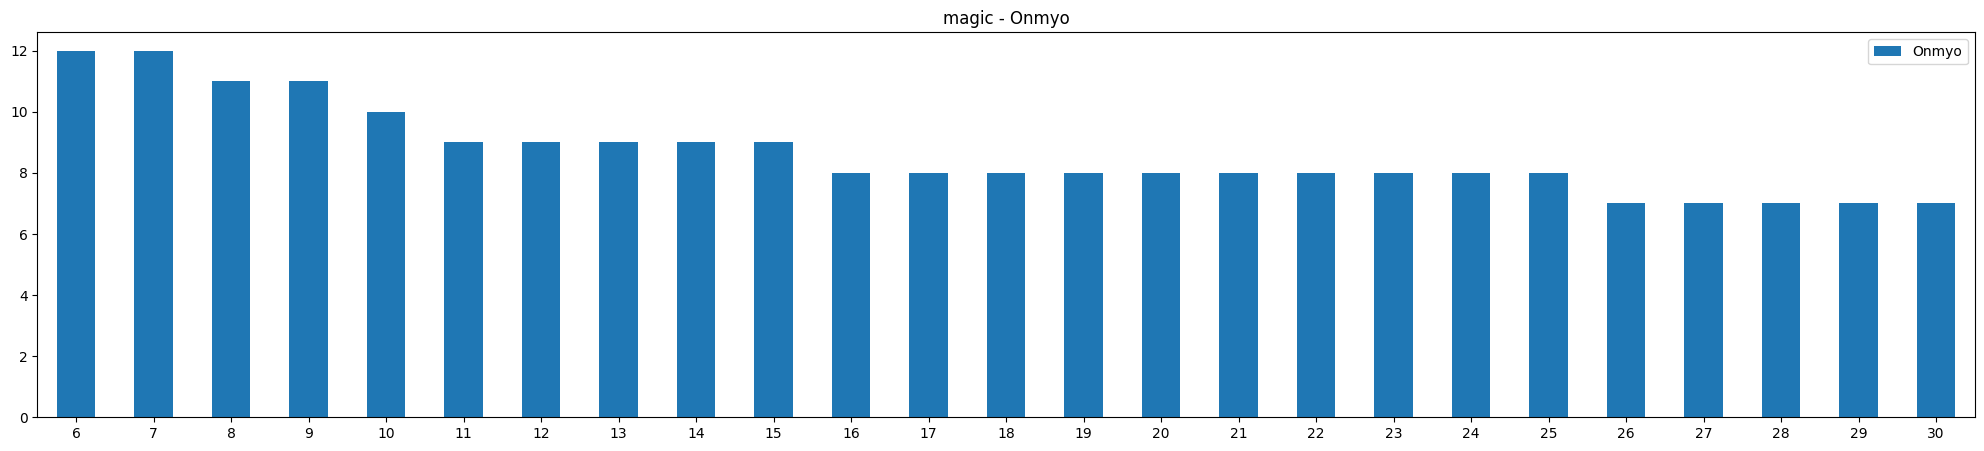

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Onmyo,12,12,11,11,10,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7


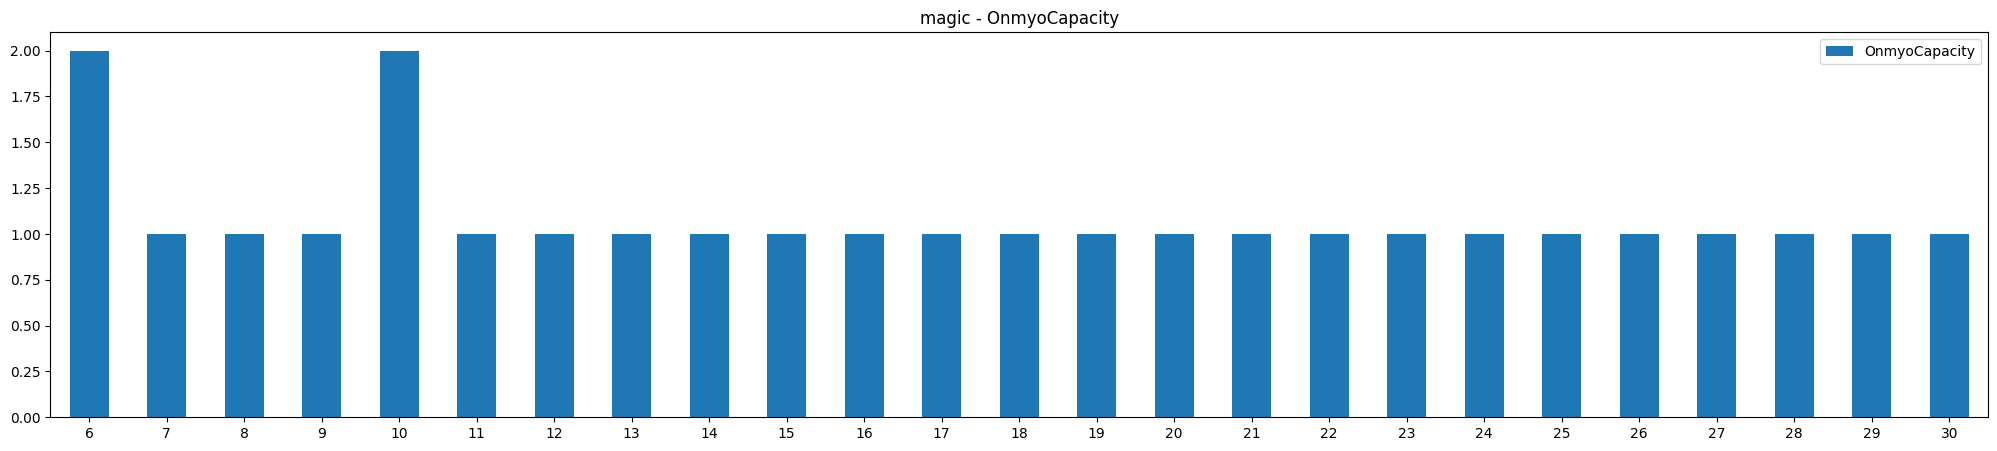

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
OnmyoCapacity,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
for df_name, ser_names in BASE_STATS_DICT.items():
    df = data[df_name]
    for ser_name in ser_names:
        if ser_name in ["Fire", "Water", "Lightning", "Poison", "Paralysis"]:
            continue
        ser = df[ser_name]
        ser_n = DataFrame((ser - ser.shift(fill_value=0))[6:31])
        ser_n.plot.bar(
            title=f"{df_name} - {ser_name}",
            figsize=(25, 5),
            rot=0,
        )
        plt.show()
        display(ser_n.transpose())


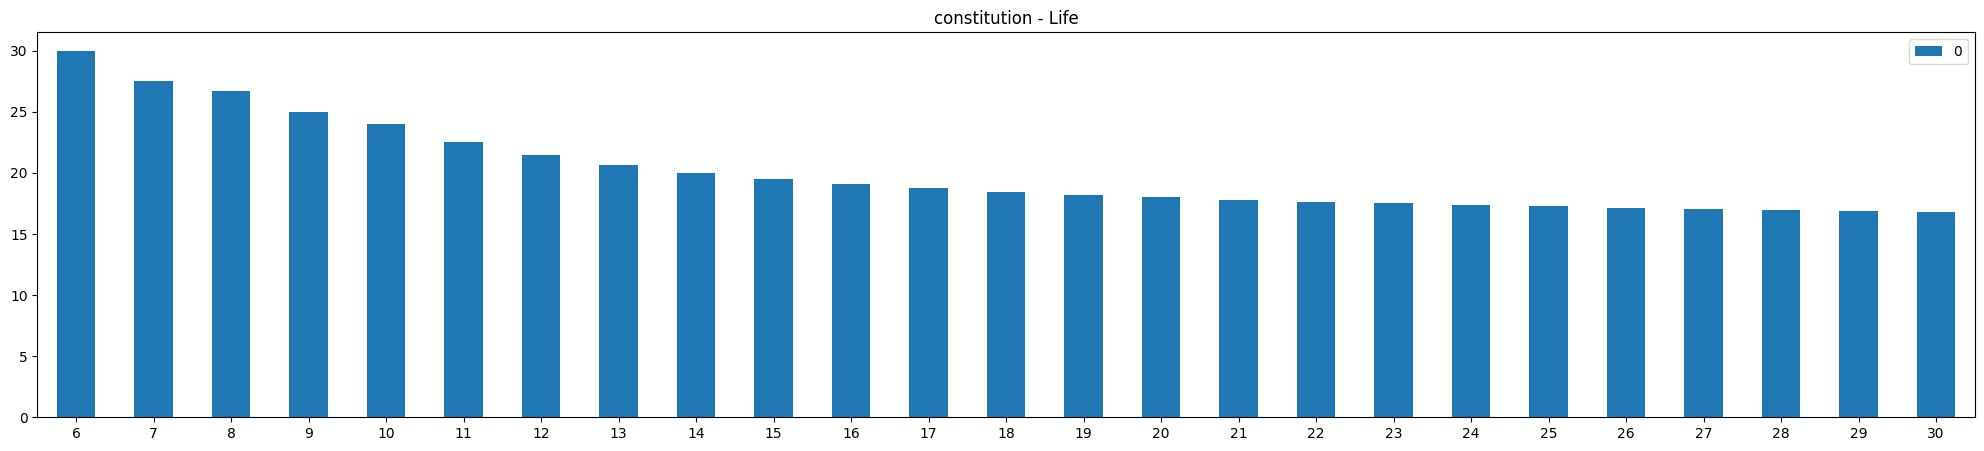

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,30.0,27.5,26.67,25.0,24.0,22.5,21.43,20.62,20.0,19.5,19.09,18.75,18.46,18.21,18.0,17.81,17.65,17.5,17.37,17.25,17.14,17.05,16.96,16.88,16.8


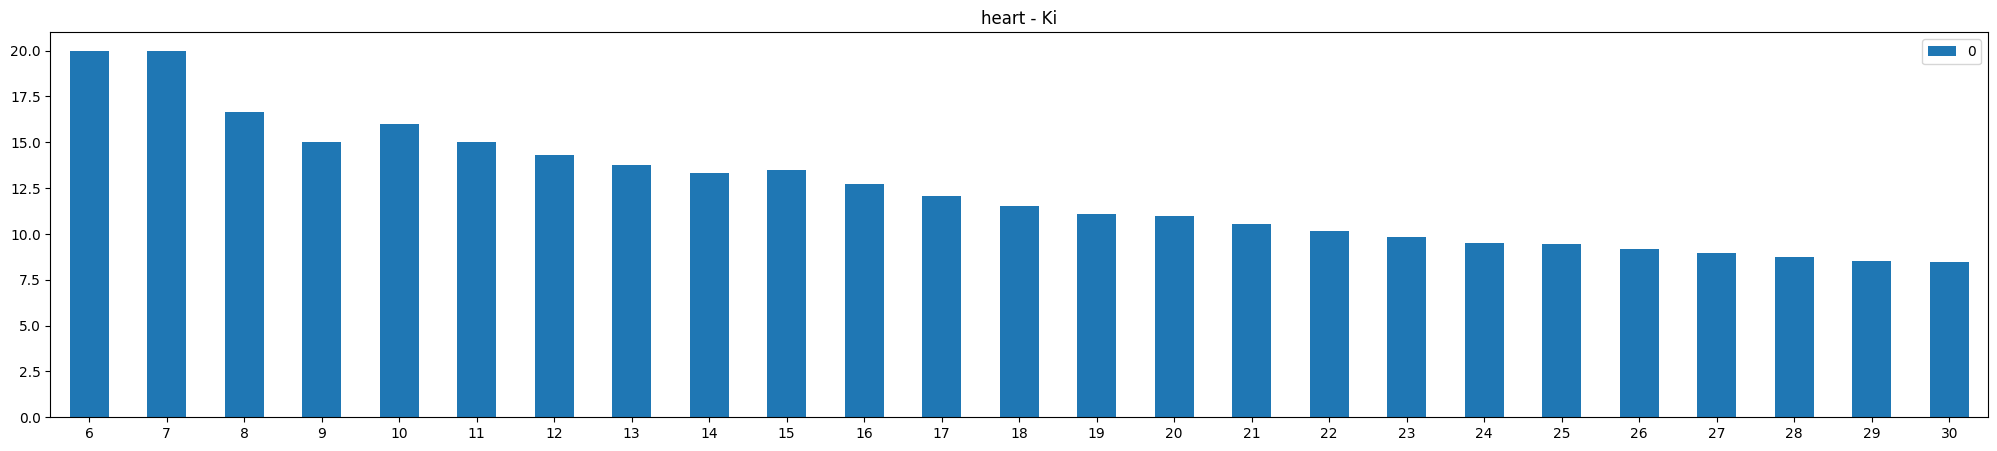

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,20.0,20.0,16.67,15.0,16.0,15.0,14.29,13.75,13.33,13.5,12.73,12.08,11.54,11.07,11.0,10.56,10.18,9.83,9.53,9.45,9.19,8.95,8.74,8.54,8.48


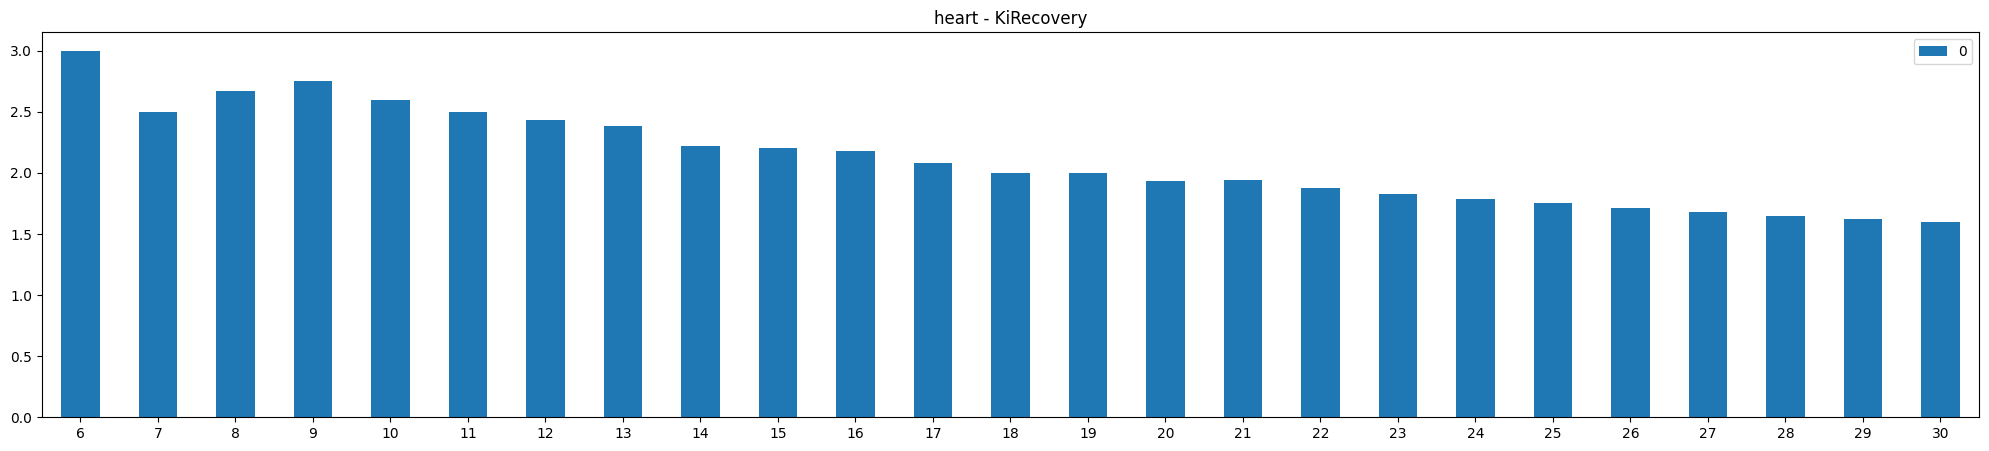

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,3.0,2.5,2.67,2.75,2.6,2.5,2.43,2.38,2.22,2.2,2.18,2.08,2.0,2.0,1.93,1.94,1.88,1.83,1.79,1.75,1.71,1.68,1.65,1.62,1.6


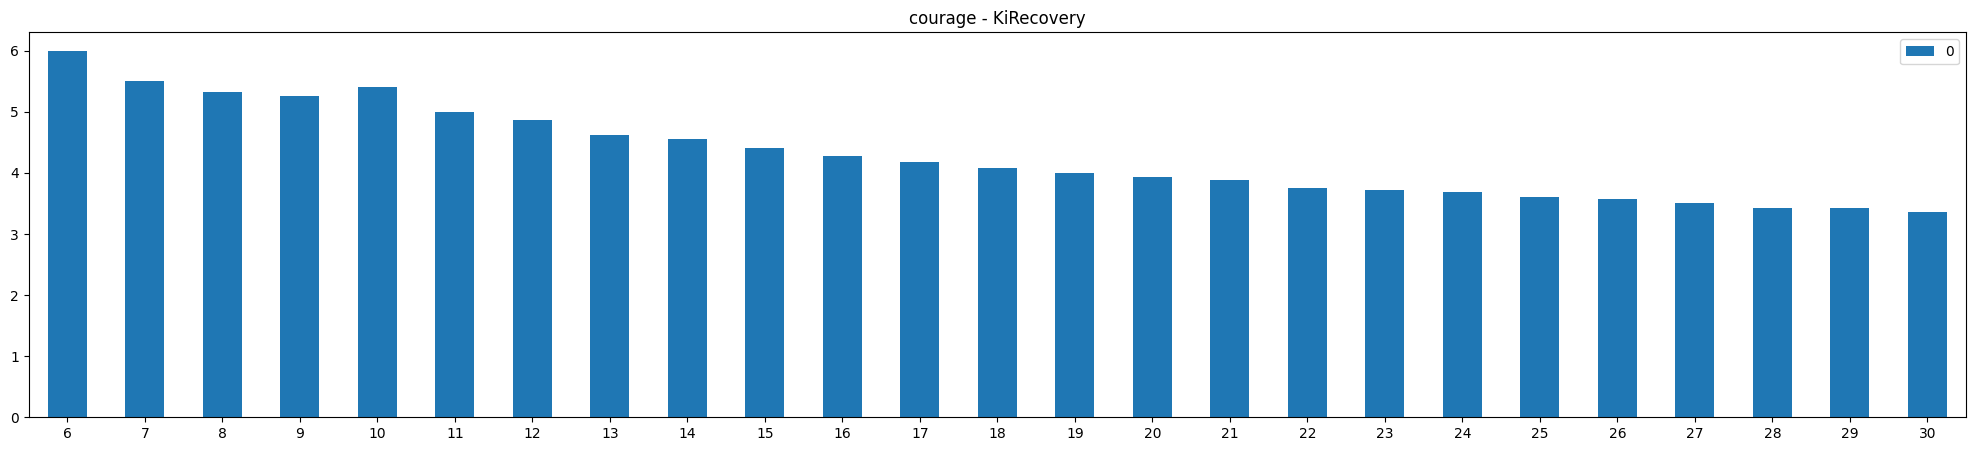

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,6.0,5.5,5.33,5.25,5.4,5.0,4.86,4.62,4.56,4.4,4.27,4.17,4.08,4.0,3.93,3.88,3.76,3.72,3.68,3.6,3.57,3.5,3.43,3.42,3.36


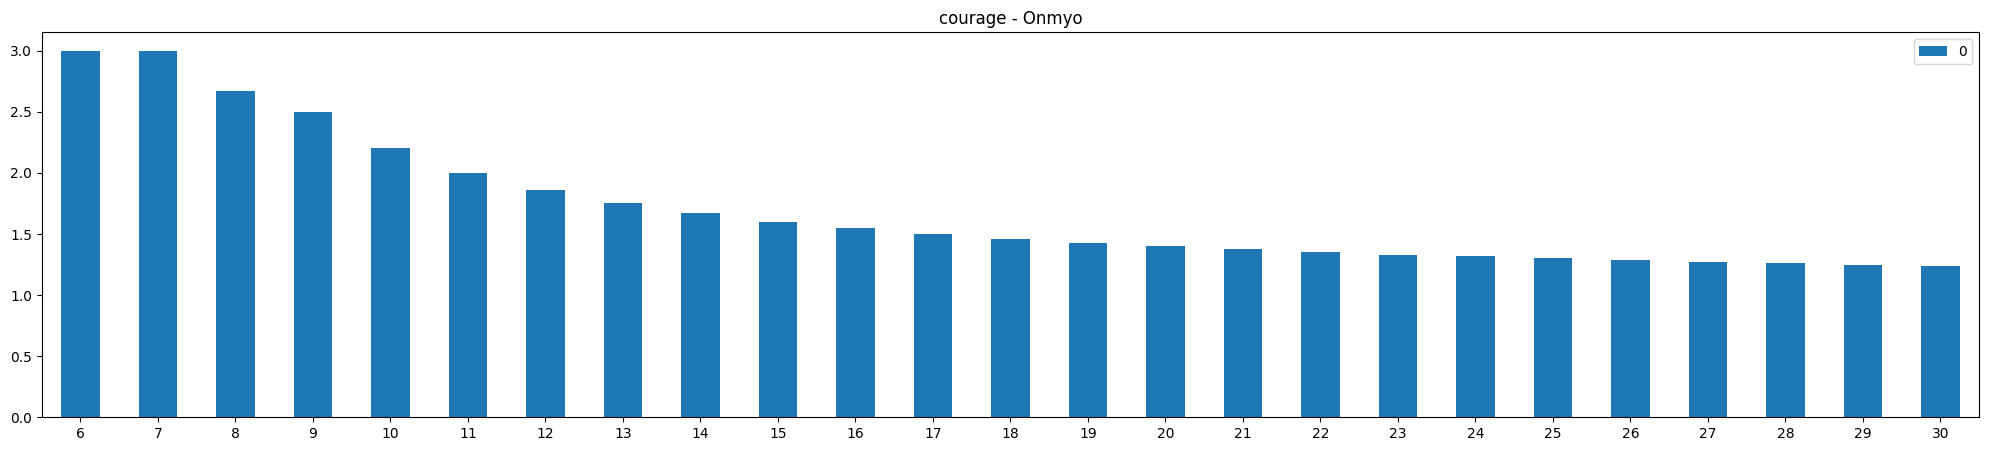

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,3.0,3.0,2.67,2.5,2.2,2.0,1.86,1.75,1.67,1.6,1.55,1.5,1.46,1.43,1.4,1.38,1.35,1.33,1.32,1.3,1.29,1.27,1.26,1.25,1.24


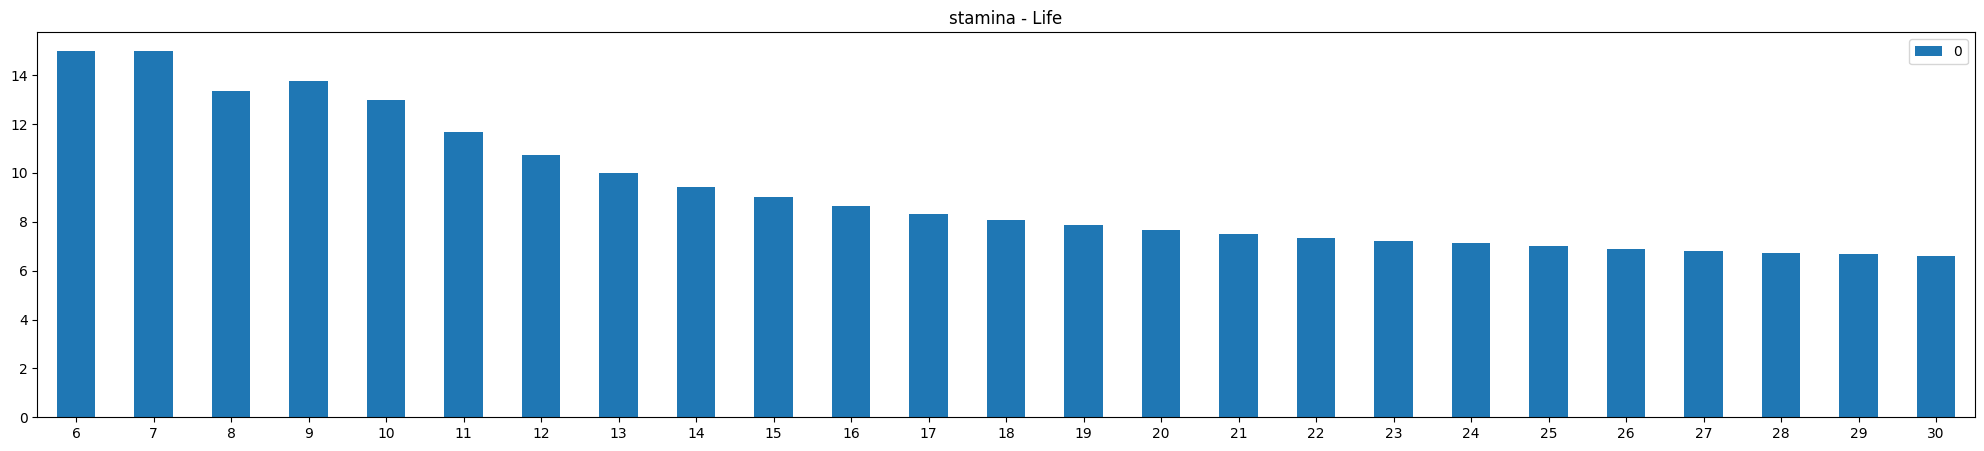

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,15.0,15.0,13.33,13.75,13.0,11.67,10.71,10.0,9.44,9.0,8.64,8.33,8.08,7.86,7.67,7.5,7.35,7.22,7.11,7.0,6.9,6.82,6.74,6.67,6.6


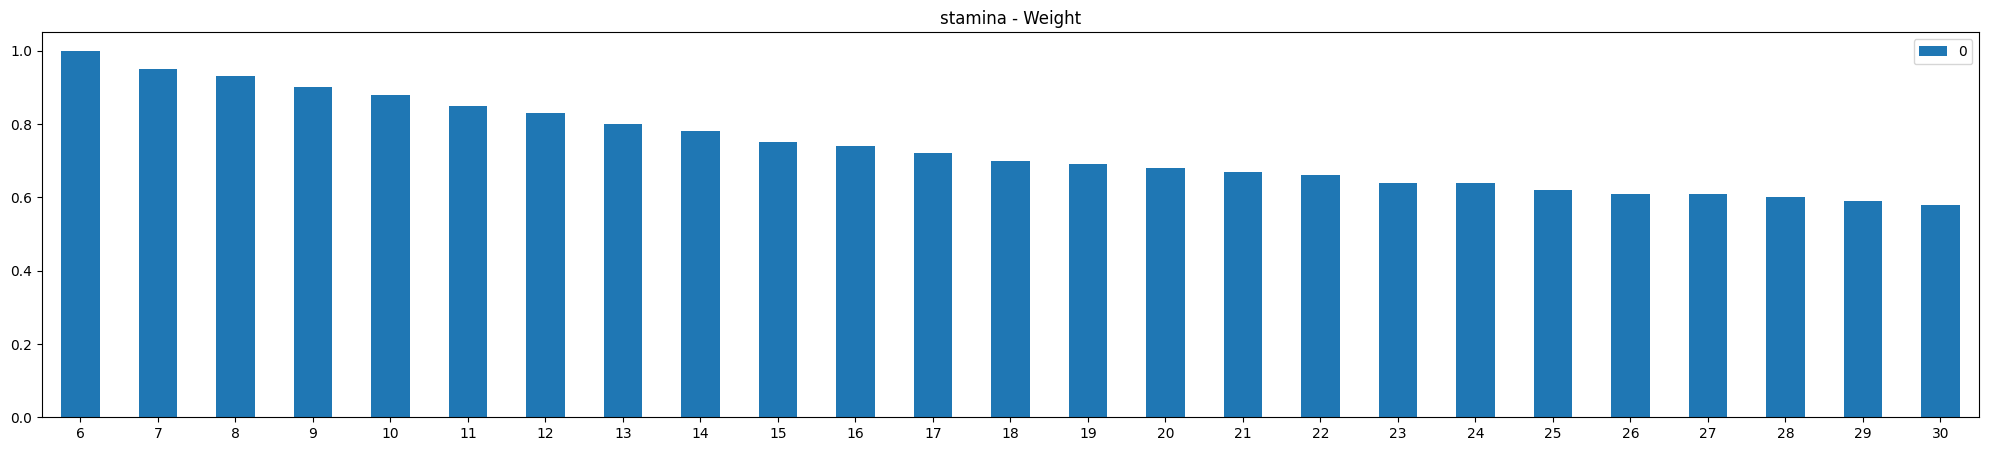

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1.0,0.95,0.93,0.9,0.88,0.85,0.83,0.8,0.78,0.75,0.74,0.72,0.7,0.69,0.68,0.67,0.66,0.64,0.64,0.62,0.61,0.61,0.6,0.59,0.58


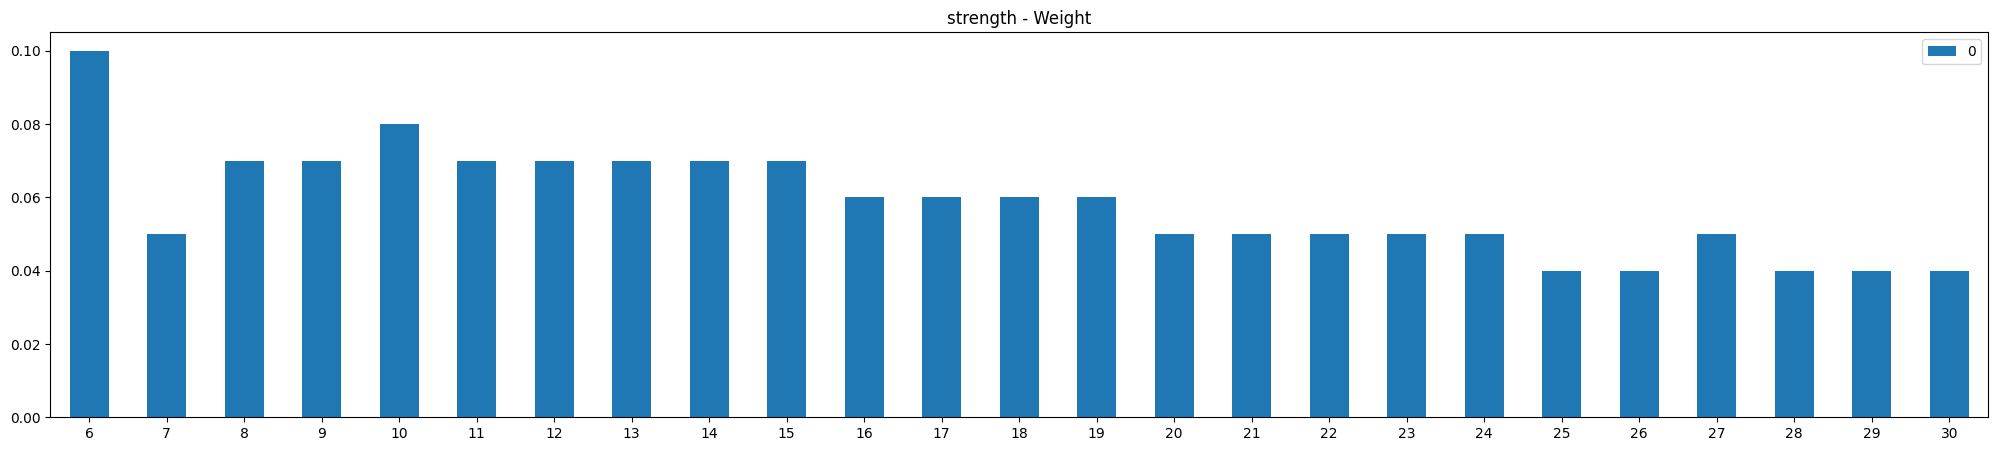

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.1,0.05,0.07,0.07,0.08,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.05,0.04,0.04,0.04


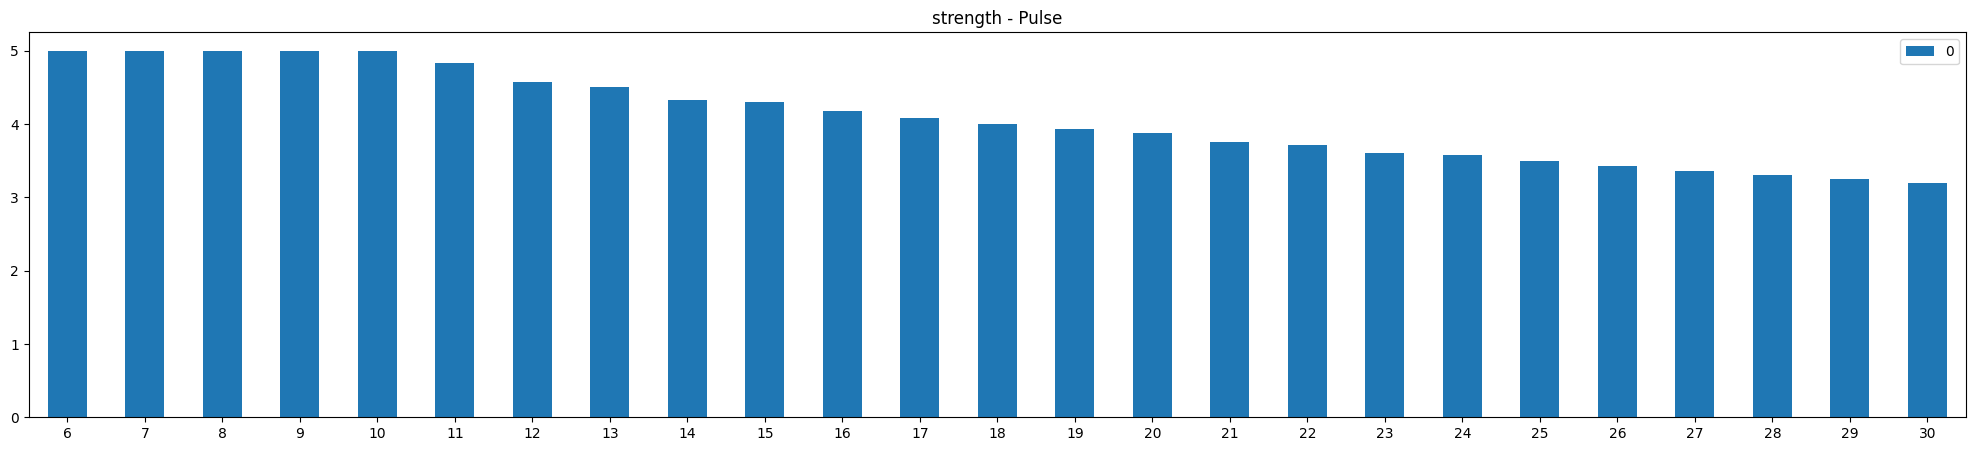

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,5.0,5.0,5.0,5.0,5.0,4.83,4.57,4.5,4.33,4.3,4.18,4.08,4.0,3.93,3.87,3.75,3.71,3.61,3.58,3.5,3.43,3.36,3.3,3.25,3.2


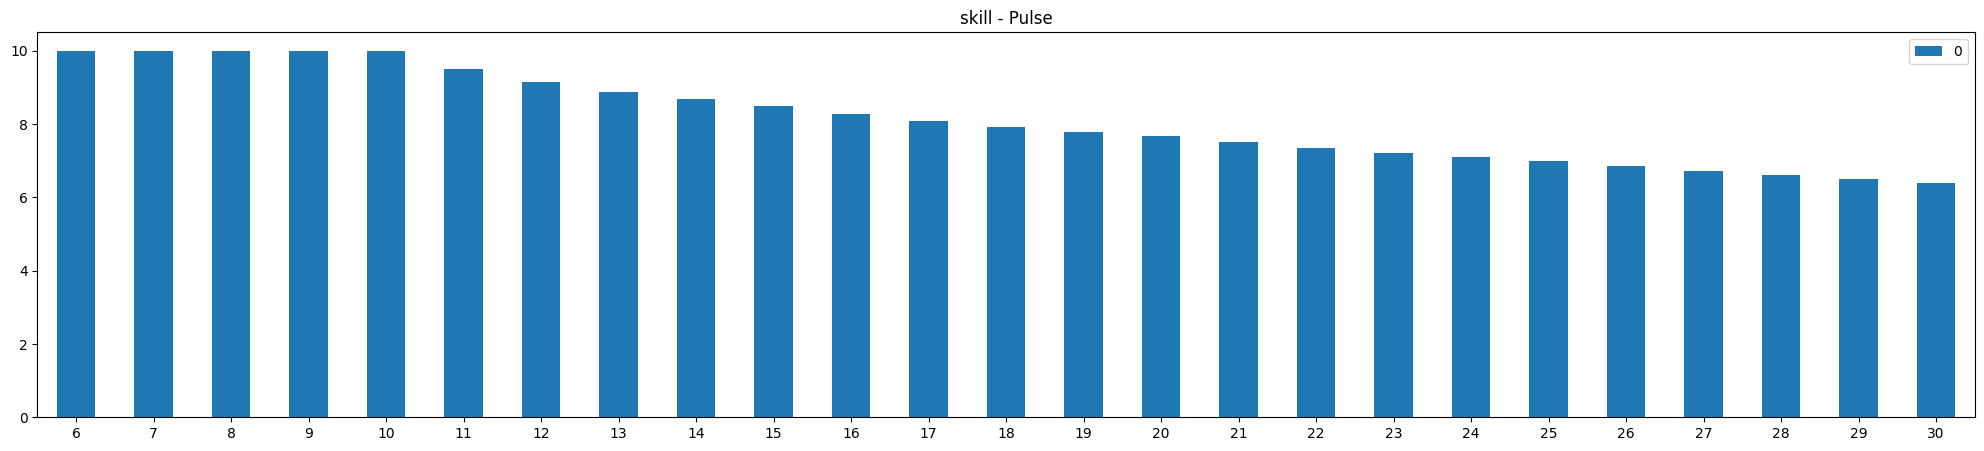

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,10.0,10.0,10.0,10.0,10.0,9.5,9.14,8.88,8.67,8.5,8.27,8.08,7.92,7.79,7.67,7.5,7.35,7.22,7.11,7.0,6.86,6.73,6.61,6.5,6.4


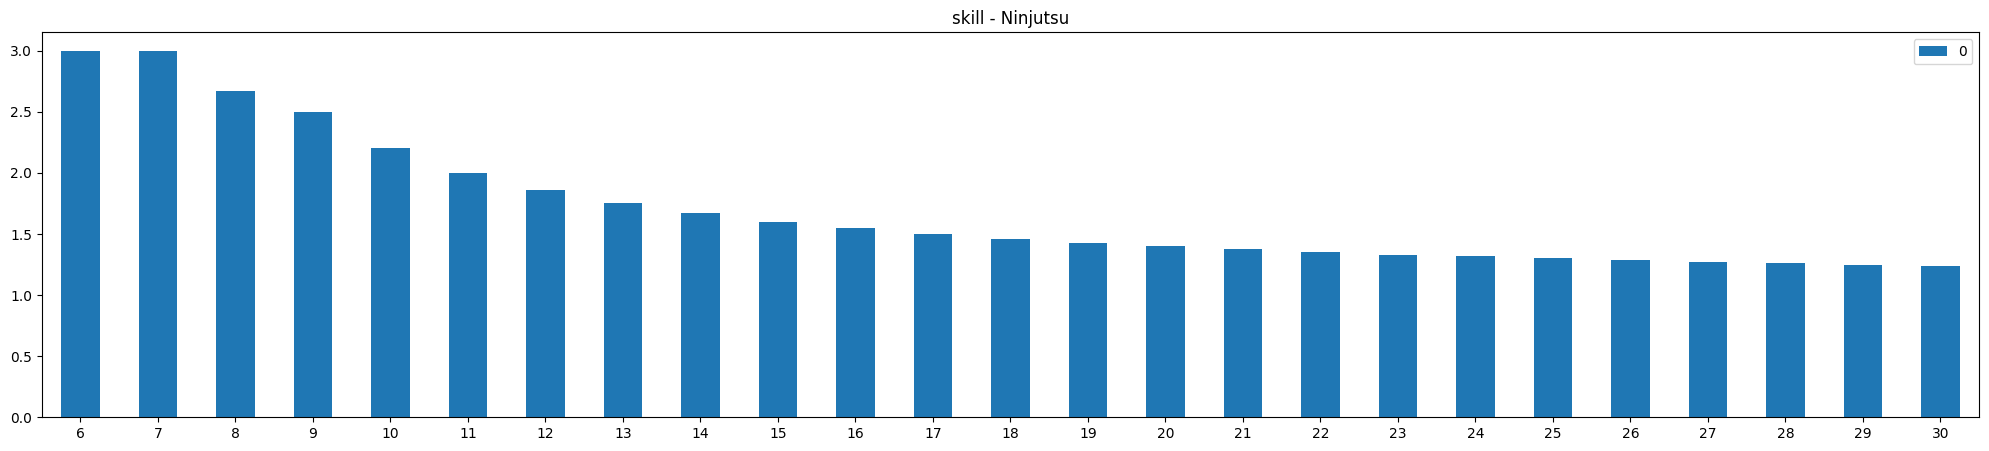

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,3.0,3.0,2.67,2.5,2.2,2.0,1.86,1.75,1.67,1.6,1.55,1.5,1.46,1.43,1.4,1.38,1.35,1.33,1.32,1.3,1.29,1.27,1.26,1.25,1.24


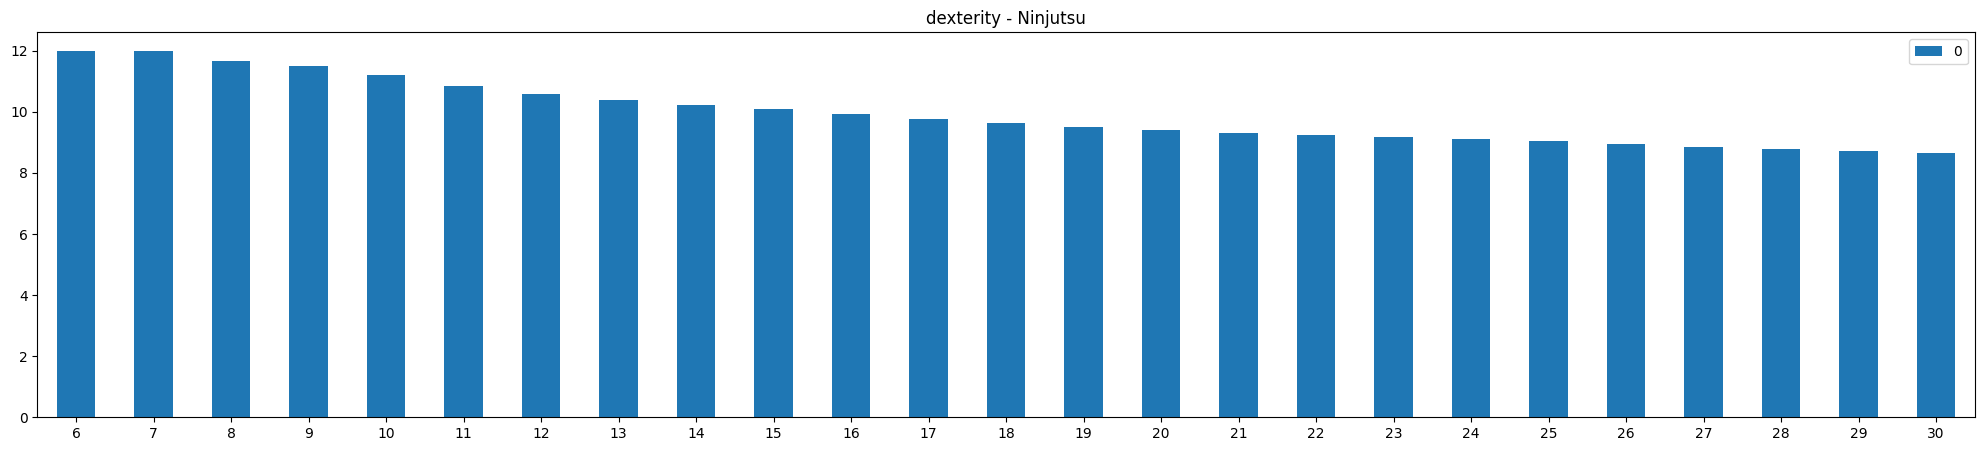

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,12.0,12.0,11.67,11.5,11.2,10.83,10.57,10.38,10.22,10.1,9.91,9.75,9.62,9.5,9.4,9.31,9.24,9.17,9.11,9.05,8.95,8.86,8.78,8.71,8.64


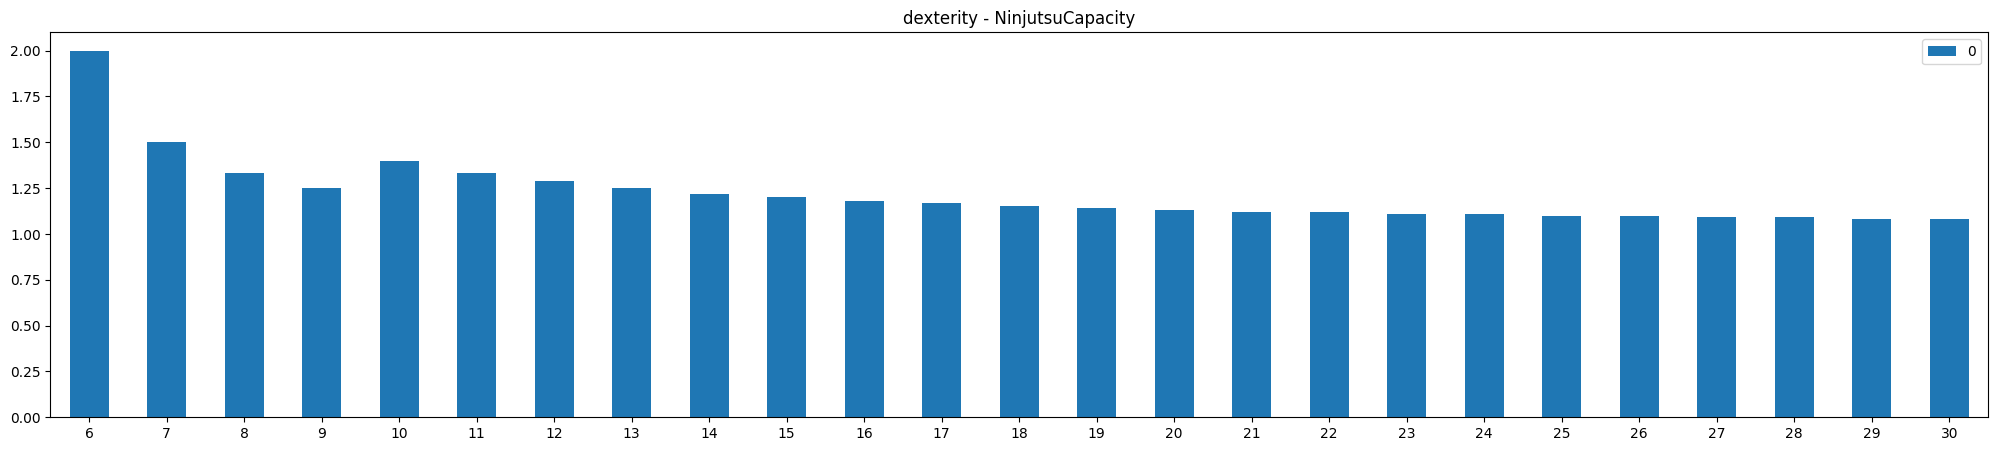

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2.0,1.5,1.33,1.25,1.4,1.33,1.29,1.25,1.22,1.2,1.18,1.17,1.15,1.14,1.13,1.12,1.12,1.11,1.11,1.1,1.1,1.09,1.09,1.08,1.08


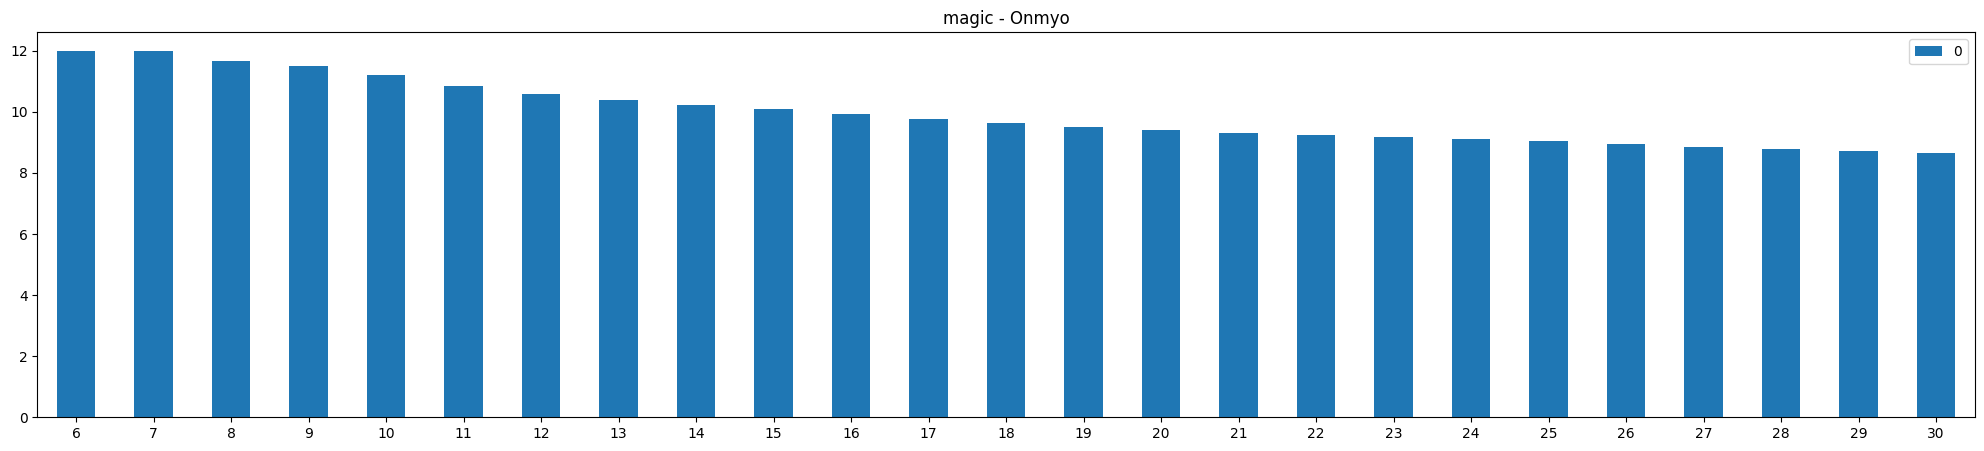

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,12.0,12.0,11.67,11.5,11.2,10.83,10.57,10.38,10.22,10.1,9.91,9.75,9.62,9.5,9.4,9.31,9.24,9.17,9.11,9.05,8.95,8.86,8.78,8.71,8.64


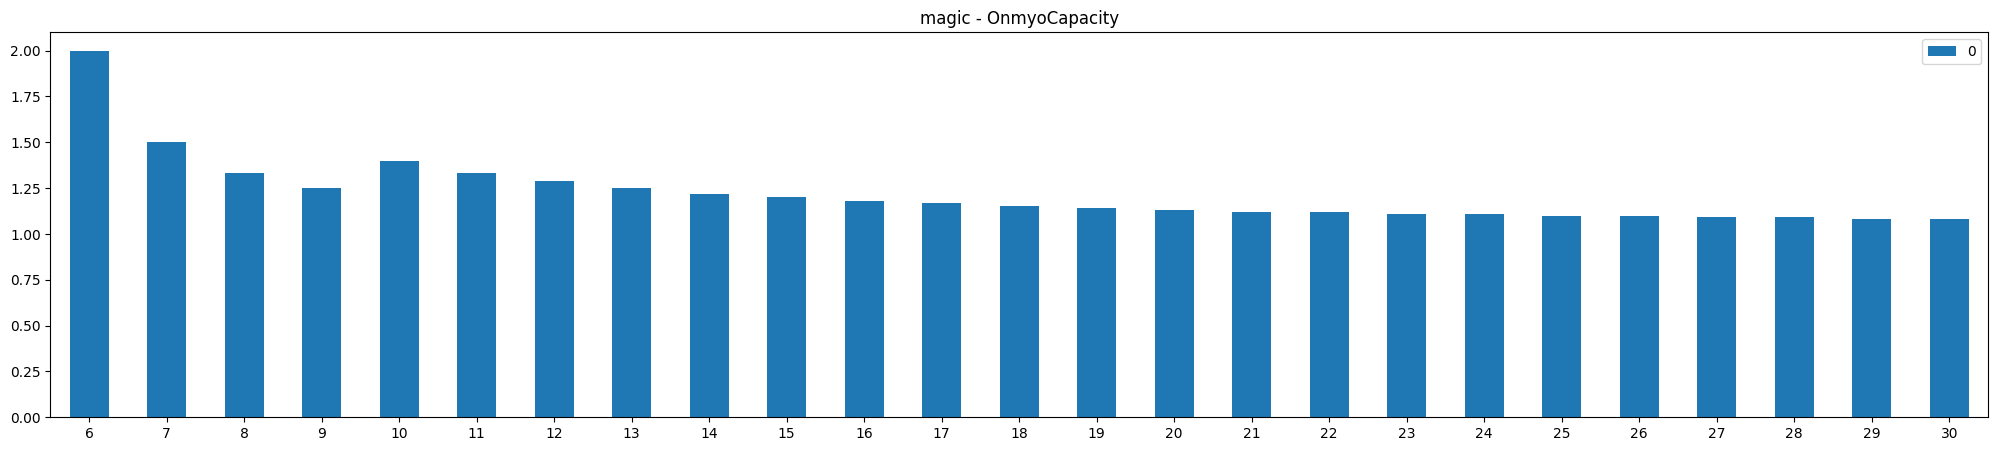

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2.0,1.5,1.33,1.25,1.4,1.33,1.29,1.25,1.22,1.2,1.18,1.17,1.15,1.14,1.13,1.12,1.12,1.11,1.11,1.1,1.1,1.09,1.09,1.08,1.08


In [6]:
for df_name, ser_names in BASE_STATS_DICT.items():
    df = data[df_name]
    for ser_name in ser_names:
        if ser_name in ["Fire", "Water", "Lightning", "Poison", "Paralysis"]:
            continue
        ser = df[ser_name]
        ser_n = DataFrame(
            data=[round(v / (i - 5), 2) for i, v in ser.items() if i > 5 and i < 31],
            index=[i for i, _ in ser.items() if i > 5 and i < 31],
        )
        ser_n.plot.bar(
            title=f"{df_name} - {ser_name}",
            figsize=(25, 5),
            rot=0,
        )
        plt.show()
        display(ser_n.transpose())


In [44]:
from dataclasses import dataclass, asdict, astuple


@dataclass
class Stats:
    constitution: int = 5
    heart: int = 5
    courage: int = 5
    stamina: int = 5
    strength: int = 5
    skill: int = 5
    dexterity: int = 5
    magic: int = 5

    @property
    def level(self) -> int:
        return max(1, sum(astuple(self)) - 42)

    @property
    def stats(self) -> DataFrame:
        base: Dict[str, DataFrame] = {
            "base": data["base"].loc[[0]],
            "life": data["level"].loc[[self.level]],
        }
        df = pd.concat(list(base.values()), keys=base.keys())
        stats_df = pd.concat(
            [DataFrame(data[k].loc[[max(5, v)]]) for k, v in asdict(self).items()],
            keys=asdict(self).keys(),
        )
        return pd.concat([df, stats_df])

    @property
    def result(self) -> DataFrame:
        index = {"sum": ("sum", self.level)}
        return DataFrame(self.stats.agg(["sum"])).rename(index=index)

    @property
    def full(self) -> DataFrame:
        return pd.concat([self.stats, self.result])

    @property
    def weight(self) -> float:
        return self.stats["Weight"].sum()

    @property
    def agility(self) -> DataFrame:
        weights = {
            key: [
                round(((self.weight * x) - 0.2) * (value / 13), 1)
                for x in [0.7, 0.3, 0.2]
            ]
            for key, value in {"full": 13, "body": 4, "pants": 3, "small": 2}.items()
        }
        return DataFrame(weights, index=["B", "A", "AA"])


In [8]:
stats = Stats(
    constitution=25,
    heart=20,
    courage=15,
    stamina=33,
    strength=12,
    skill=10,
    dexterity=15,
    magic=15,
)

stats.full


,,Life,Ki,KiRecovery,Weight,Pulse,Ninjutsu,NinjutsuCapacity,Onmyo,OnmyoCapacity,Fire,Water,Lightning,Poison,Paralysis
base,0,880,960.0,294.0,29.5,300.0,10.0,3.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0
life,103,995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
constitution,25,345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,6.5
heart,20,0,165.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0
courage,15,0,0.0,44.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,4.0,0.0,0.0
stamina,33,180,0.0,0.0,15.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
strength,12,0,0.0,0.0,0.5,32.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0
skill,10,0,0.0,0.0,0.0,50.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dexterity,15,0,0.0,0.0,0.0,0.0,101.0,12.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
magic,15,0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,12.0,0.0,0.0,0.0,0.0,0.0


In [45]:
stats.agility

,full,body,pants,small
B,31.7,9.8,7.3,4.9
A,13.5,4.1,3.1,2.1
AA,8.9,2.7,2.1,1.4


In [46]:
Stats(
  stamina=53,
  strength=18
).agility

,full,body,pants,small
B,34.9,10.8,8.1,5.4
A,14.9,4.6,3.4,2.3
AA,9.8,3.0,2.3,1.5


In [49]:
pd.DataFrame(
    data=[[int(2 ** (y - x)) for y in range(20)] for x in range(20)],
    index=range(1, 21),
    columns=range(1, 21),
)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536,131072,262144,524288
2,0,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536,131072,262144
3,0,0,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536,131072
4,0,0,0,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536
5,0,0,0,0,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768
6,0,0,0,0,0,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384
7,0,0,0,0,0,0,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192
8,0,0,0,0,0,0,0,1,2,4,8,16,32,64,128,256,512,1024,2048,4096
9,0,0,0,0,0,0,0,0,1,2,4,8,16,32,64,128,256,512,1024,2048
10,0,0,0,0,0,0,0,0,0,1,2,4,8,16,32,64,128,256,512,1024
